# **Author : ROHIT WADHAVE**
###  **The Sparks Foundation** - Data Science and Business Analytics 
#####            *(GRIP DECEMBER'22)*



#  Task 2 : Prediction using Unsupervised Machine Learning

### Problem Statement

Aim: From the given 'Iris' dataset, print the optimum number of clusters and represent it visually.

## **Importing all libraries required in this notebook**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

####  Dataset needed  : https://bit.ly/3kXTdox

Read the csv dataset as a pandas dataframe. 

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Sparks Task 2 - Prediction using Unsupervised ML\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.drop('Id', axis=1, inplace=True)           # Dropping extra unnecessary column from the dataset

## **Data Understanding**

In [4]:
df.shape

(150, 5)

In [5]:
df.head()          # Check top 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()          # Check last 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.describe()                 # Statistical information of dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Check if missing values present or not**

In [10]:
df.isnull().sum()             # Displays sum total of null values present in dataset

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

***------>  No null values are  present in the 'Iris' dataset.***

In [11]:
df.duplicated().sum()         # check for duplicates

3

In [12]:
df.nunique()                  # check for uniques values

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [13]:
df.corr()                     # check correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## **Convert categorical feature into numerical using label encoding**

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [15]:
LabelEncoder = preprocessing.LabelEncoder()
df['Species'] = LabelEncoder.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


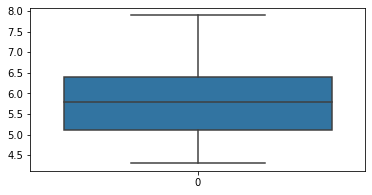

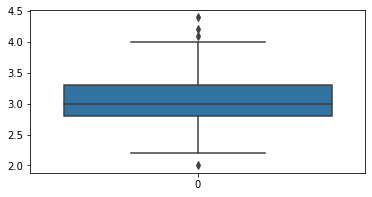

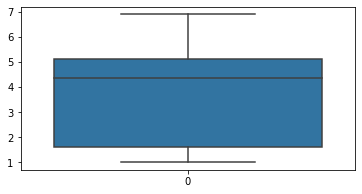

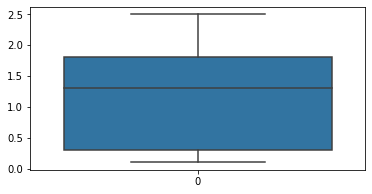

In [16]:
for i in df.columns:                                ## Check for any outliers in the numeric data
    if df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(df[i])
        plt.show()

In [17]:
q1,q3 = np.percentile(df['SepalWidthCm'],[25,75])                  ## Treating outliers present in the SepalWidthCm column
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
        


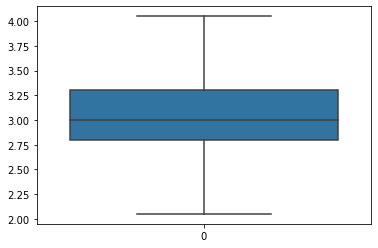

In [18]:
sns.boxplot(df['SepalWidthCm']);

## **Normalizing data**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

scaled_df

array([[-9.00681170e-01,  1.06572221e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.20170457e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.54186609e-01, -1.39813811e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.50652052e+00,  1.17008076e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.30290074e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-5.37177559e-01,  2.01443634e+00, -1.17067529e+00,
        -1.05003079e+00, -1.22474487e+00],
       [-1.50652052e+00,  8.28543675e-01, -1.34127240e+00,
        -1.18150376e+00, -1.22474487e+00],
       [-1.02184904e+00,  8.28543675e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.57348990e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00,  1.17008076e-01, -1.28440670e+00,
        -1.44444970e+00

In [20]:
df.Species.unique()

array([0, 1, 2])

## **Model building**

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')     # create clusters

In [22]:
y_hc = hc.fit_predict(scaled_df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,2
...,...
145,0
146,0
147,0
148,0


## **K-Means Clustering**

In [23]:
from sklearn.cluster import KMeans

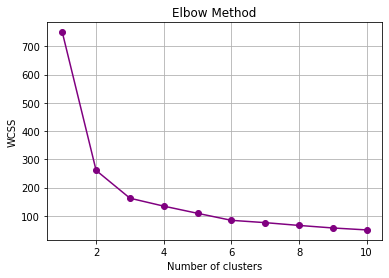

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o', color='purple')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

***------->   You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.***

In [25]:
wcss

[750.0000000000002,
 260.8726568107453,
 162.47940204088474,
 134.3788237527064,
 108.98528907863553,
 84.1565966119573,
 75.94244264585153,
 66.0906190799527,
 57.08901492110105,
 50.20678287294912]

In [26]:
clusters_new = KMeans(3, max_iter=500, algorithm='auto', random_state=42)       #Build Cluster algorithm
clusters_new.fit(scaled_df)

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [27]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

In [28]:
df['clusterid_new'] = clusters_new.labels_                                    #Assign clusters to the data set

In [29]:
clusters_new.cluster_centers_

array([[ 1.08805236, -0.01704936,  1.0396699 ,  1.09640835,  1.14487021],
       [-1.01457897,  0.84514617, -1.30487835, -1.25512862, -1.22474487],
       [ 0.01256556, -0.76801923,  0.32257597,  0.22817864,  0.15876322]])

In [30]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,,mean,mean,mean,mean,mean
0,0,6.741304,3.043478,5.586957,2.032609,1.934783
1,1,5.006000,3.407000,1.464000,0.244000,0.000000
2,2,5.853704,2.726852,4.325926,1.372222,1.129630


In [31]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusterid_new
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',                           # Creating the kmeans classifier
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_df)

In [33]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

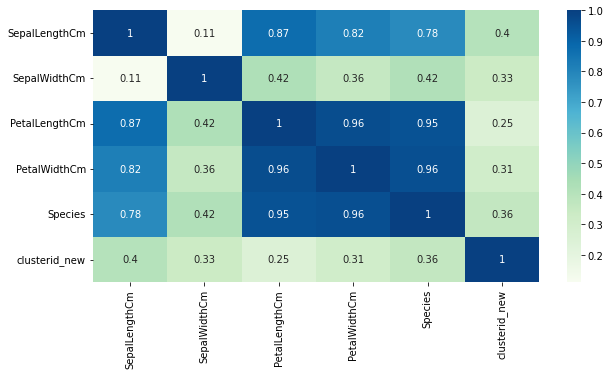

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(df.corr()), cmap='GnBu', annot=True);

## **Data Visualisation**

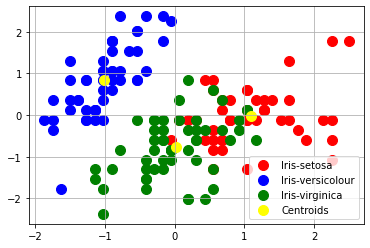

In [35]:
plt.scatter(scaled_df[y_kmeans == 0, 0], scaled_df[y_kmeans == 0, 1],          # Visualising the clusters - On the first two columns
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_df[y_kmeans == 1, 0], scaled_df[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_df[y_kmeans == 2, 0], scaled_df[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],       # Plotting the centroids of the clusters
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.grid()
plt.show()

****

# **Conclusion**

## -----> ***I was able to successfully carry-out prediction using Unsupervised Machine Learning task and was able to evaluate the model's clustering accuracy score.***